## DA Lab Assignment 04 
### Name : Md Aminul Islam Rony
### Roll : ID25M804

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import chi2_contingency
import json
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import logging
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import math
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.neighbors import KernelDensity
from sklearn.metrics import precision_recall_curve

logging.getLogger('matplotlib').propagate = False
logging.getLogger('matplotlib').setLevel(logging.WARNING)


## Part A: Baseline Model and Data Analysis

### Part 01 : Data Loading and Analysis

In [2]:
df_credits = pd.read_csv('creditcard.csv')
print("The first few rows of the credits dataset\n")
df_credits.head()
df_credits.shape

The first few rows of the credits dataset



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

In [3]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Mean and variance of the principal components

In [4]:
df_credits.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### From V1 to V28, all features have already been standardized using PCA. However, the Time and Amount columns remain unstandardized. If left as they are, the model may fail to converge, so the next step is to standardize these two columns.

In [5]:
cols_to_standardize = ['Time','Amount']
scaler = StandardScaler()
df_credits[cols_to_standardize] = scaler.fit_transform(df_credits[cols_to_standardize])

### Part 02 : Analyzing Class Distribution

In [6]:
class_counts = df_credits['Class'].value_counts()
print("Class Distribution:\n", class_counts)

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


### Visualizing using a bar plot

<Figure size 1000x800 with 0 Axes>

C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\2303050905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


([<matplotlib.axis.XTick at 0x24cc6a3c6e0>,
 [Text(0, 0, 'Non-Fraud (0)'), Text(1, 0, 'Fraud (1)')])

Text(0.5, 1.05, 'Class Distribution')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Class')

[Text(0, 0, '284315')]

[Text(0, 0, '492')]

Text(0.5, -0.05, 'This plot shows the distribution of fraudulent and non-fraudulent transactions.\n')

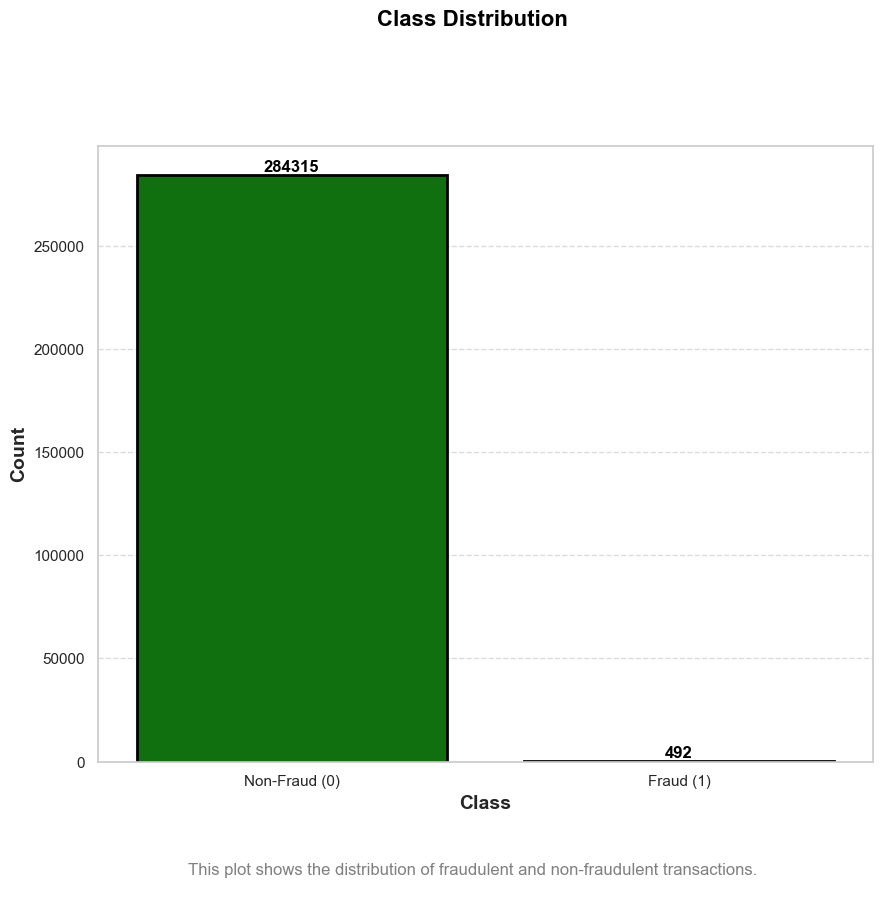

In [7]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10,8))

colors = ["green", "red"]

ax = sns.barplot(
    x=class_counts.index, 
    y=class_counts.values, 
    palette=colors, 
    edgecolor="black",
    linewidth=2
)

plt.xticks([0,1], ["Non-Fraud (0)", "Fraud (1)"])
plt.suptitle("Class Distribution", fontsize=16, fontweight="bold", y=1.05, color="black")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.xlabel("Class", fontsize=14, fontweight="bold")

for container in ax.containers:
    ax.bar_label(container, fontsize=12, fontweight="bold", color="black")

plt.figtext(
    0.5, -0.05, 
    "This plot shows the distribution of fraudulent and non-fraudulent transactions.\n",
    wrap=True, ha="center", fontsize=12, color="gray"
)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### Visualizing using pie chart

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.05, 'Class Distribution')

Text(0.5, -0.05, 'This pie chart is showing the distribution of fraudulent (1) and non-fraudulent (0) transactions.\nIt is highlighting non-fraud in green and fraud in red for intuitive interpretation.')

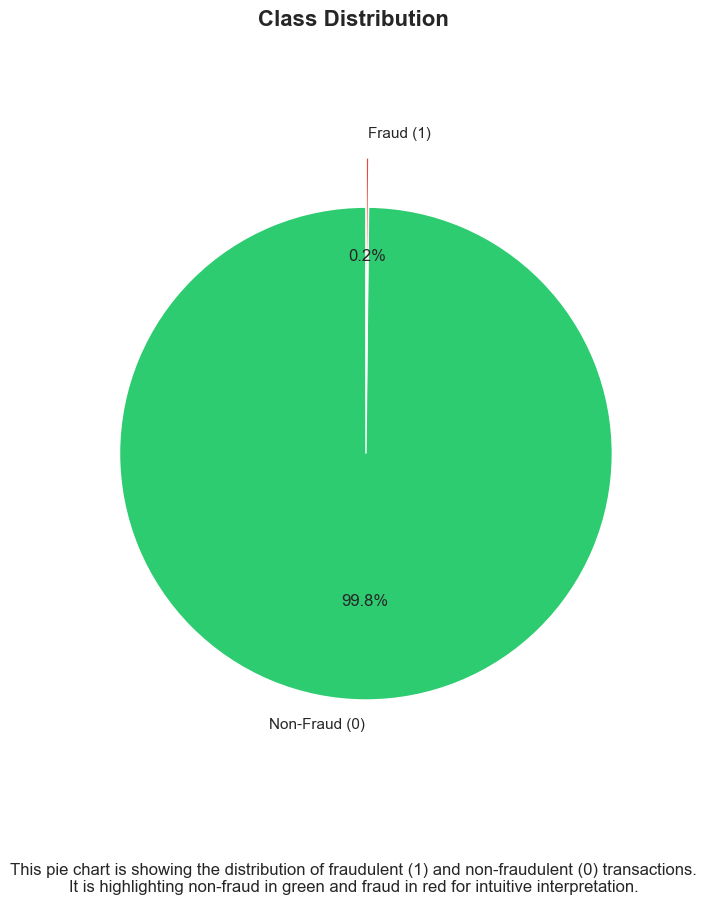

In [8]:
sns.set(style="darkgrid")  

plt.figure(figsize=(10,8))

explode = [0, 0.2]  

labels = ["Non-Fraud (0)", "Fraud (1)"]

# Defining custom colors: green for non-fraud, red for fraud
colors = ["#2ecc71", "#e74c3c"]  

# Creating a pie chart showing the class distribution
# - values are coming from class_counts
# - labels are assigning class names
ax = plt.pie(
    class_counts.values, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors,  
    explode=explode, 
    startangle=90  
)

plt.suptitle("Class Distribution", fontsize=16, fontweight="bold", y=1.05)

plt.figtext(
    0.5, -0.05, 
    "This pie chart is showing the distribution of fraudulent (1) and non-fraudulent (0) transactions.\n"
    "It is highlighting non-fraud in green and fraud in red for intuitive interpretation.",
    wrap=True, ha="center", fontsize=12
)

plt.show()

In [9]:
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1 (major class:minor class)")

Imbalance ratio: 577.88:1 (major class:minor class)


### The target class distribution is showing a strong imbalance, as about 99.8% of the records correspond to non-fraudulent cases, making it the dominant class. In contrast, the fraudulent cases account for only 0.2% of the data. This imbalance is further highlighted by the ratio, where for every single fraud instance, there are roughly 578 non-fraud instances.

### Part 03: Creating a baseline logistic regression model

In [10]:
# columns that are being standardized
cols_to_standardize = ['Time','Amount']

# Initializing the scaler for standardization
scaler = StandardScaler()

# Standardizing 'Time' and 'Amount' columns and updating them in the dataframe
df_credits[cols_to_standardize] = scaler.fit_transform(df_credits[cols_to_standardize])

# Separating features (X) and target variable (y)
X = df_credits.drop(["Class"], axis=1)   # Dropping target column from features
y = df_credits["Class"]                  # Storing the target column

# Initializing a dictionary for storing classification reports
reports = {}

# Splitting the dataset into training and testing sets
# - stratify=y ensures balanced class distribution
# - test_size=0.3 means 30% of data is used for testing
# - random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Initializing a baseline Logistic Regression model
# - max_iter=1000 ensures convergence
# - solver='lbfgs' is handling optimization
baseline_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Training the model with training data
baseline_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Storing the classification report in a dictionary for later comparison
reports["Baseline"] = classification_report(
    y_test, y_pred_baseline, digits=4, output_dict=True
)

# Printing the baseline model performance report
print("=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred_baseline, digits=4))

# Printing the accuracy score as a percentage
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline)*100:.2f}%")

y_scores = baseline_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_scores)
reports["Baseline"]["PR AUC"] = pr_auc
print(f"PR AUC : {pr_auc:.4f}")

LogisticRegression(max_iter=1000)

=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
   macro avg     0.9289    0.8073    0.8581     85443
weighted avg     0.9991    0.9992    0.9991     85443

Accuracy: 99.92%
PR AUC : 0.7079


<Axes: >

Text(0.5, 1.05, 'Confusion Matrix: Logistic Regression (lbfgs)')

Text(0.5, 55.249999999999986, 'Predicted Label')

Text(96.25, 0.5, 'True Label')

[Text(0.5, 0, 'Non-Fraud (0)'), Text(1.5, 0, 'Fraud (1)')]

[Text(0, 0.5, 'Non-Fraud (0)'), Text(0, 1.5, 'Fraud (1)')]

Text(0.5, -0.05, 'The confusion matrix shows normalized values for True Negatives, False Positives, False Negatives, and True Positives.\n')

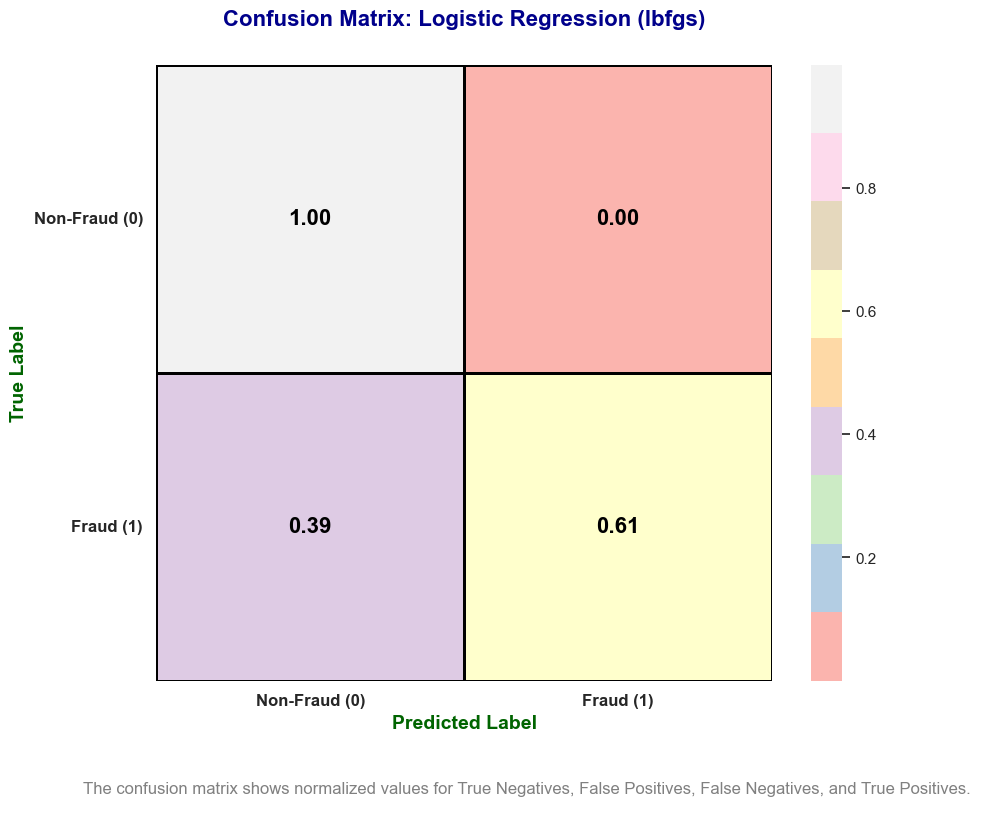

In [11]:
# Confusion matrix with light colors
fig, ax = plt.subplots(figsize=(10, 8))

cm = confusion_matrix(y_test, baseline_model.predict(X_test))
cm_norm = confusion_matrix(y_test, baseline_model.predict(X_test), normalize='true')

sns.heatmap(
    cm_norm, annot=True, fmt=".2f", cmap="Pastel1", cbar=True,   # very light pastel colors
    annot_kws={"size": 16, "weight": "bold", "color": "black"}, 
    linewidths=2, linecolor="black", square=True, ax=ax
)

ax.set_title("Confusion Matrix: Logistic Regression (lbfgs)", fontsize=16, fontweight="bold", y=1.05, color="darkblue")
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold", color="darkgreen")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold", color="darkgreen")

ax.set_xticklabels(["Non-Fraud (0)", "Fraud (1)"], fontsize=12, fontweight="bold")
ax.set_yticklabels(["Non-Fraud (0)", "Fraud (1)"], fontsize=12, fontweight="bold", rotation=0)

fig.text(
    0.5, -0.05, 
    "The confusion matrix shows normalized values for True Negatives, False Positives, False Negatives, and True Positives.\n",
    wrap=True, ha="center", fontsize=12, color="gray"
)

plt.show()

Text(0.5, 0.2, 'AP = 0.71')

Text(0.5, 1.05, 'Precision–Recall Curve: Logistic Regression (lbfgs)')

Text(0.5, 0, 'Recall (Fraud Class)')

Text(0, 0.5, 'Precision (Fraud Class)')

Text(0.5, -0.05, 'The Precision–Recall curve illustrates the trade-off between precision and recall at different thresholds.\n')

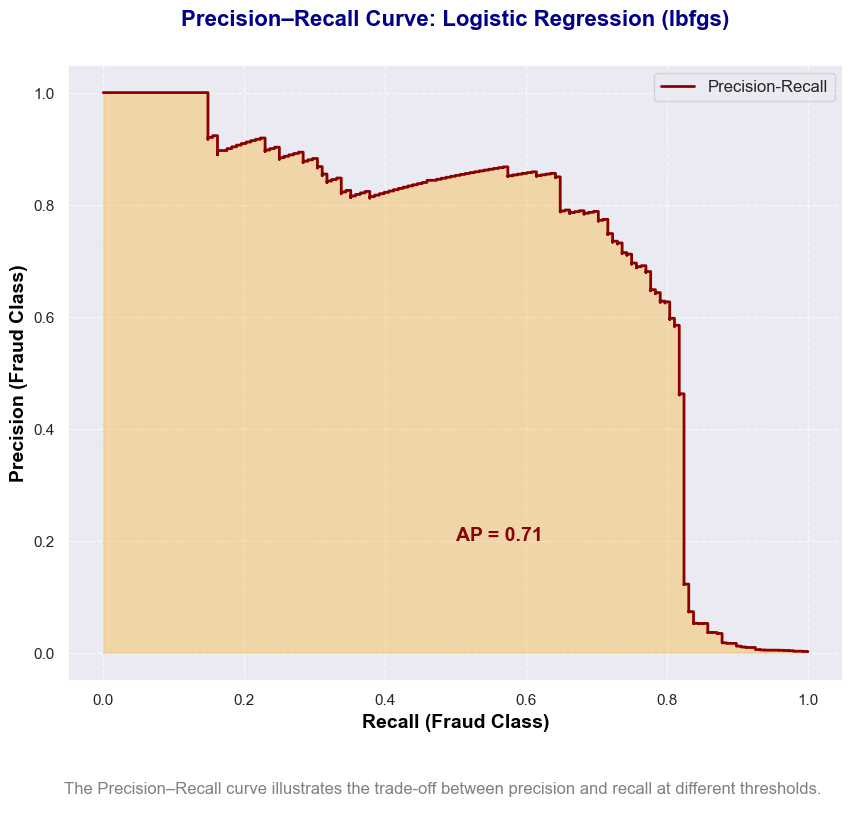

In [12]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(10, 8))

precision, recall, thresholds = precision_recall_curve(
    y_test, baseline_model.predict_proba(X_test)[:, 1]
)

plt.step(recall, precision, where="post", color="darkred", linewidth=2, label="Precision-Recall")
plt.fill_between(recall, precision, step="post", alpha=0.3, color="orange")

plt.text(
    0.5, 0.2, 
    "AP = {:.2f}".format(average_precision_score(y_test, baseline_model.predict_proba(X_test)[:,1])),
    fontsize=14, color="darkred", fontweight="bold"
)

ax.set_title("Precision–Recall Curve: Logistic Regression (lbfgs)", fontsize=16, fontweight="bold", y=1.05, color="darkblue")
ax.set_xlabel("Recall (Fraud Class)", fontsize=14, fontweight="bold", color="black")
ax.set_ylabel("Precision (Fraud Class)", fontsize=14, fontweight="bold", color="black")

ax.grid(True, linestyle="--", alpha=0.7)

fig.text(
    0.5, -0.05, 
    "The Precision–Recall curve illustrates the trade-off between precision and recall at different thresholds.\n",
    wrap=True, ha="center", fontsize=12, color="gray"
)

plt.legend(loc="upper right", fontsize=12)
plt.show()

### Confusion Matrix: Logistic Regression (lbfgs)

#### The confusion matrix displays the normalized proportions of predictions for each class.

#### **Top-left (0→0):** Almost all non-fraud (majority class) transactions are correctly identified.

#### **Bottom-left (1→0):** Around 39% of fraud cases are missed (false negatives).

#### **Bottom-right (1→1):** Only about 61% of fraudulent transactions are correctly classified. This imbalance highlights that, while overall accuracy seems strong, the model still struggles to capture the minority (fraud) class effectively.

### Precision–Recall Curve: Logistic Regression (lbfgs)

#### The precision–recall curve shows how precision and recall vary as the classification threshold changes.

#### Precision remains fairly high until recall reaches ~0.6, after which it declines steeply.

#### The **Average Precision (AP) ≈ 0.71**, representing the area under the curve.

#### In highly imbalanced datasets, PR-AUC gives a clearer picture than ROC-AUC. A curve that stays elevated suggests the model maintains strong precision even as it attempts to detect more fraud cases.

### **Classification Report**

* Although the model achieves an impressive 99.92% accuracy, its performance is actually poor. Such high accuracy can be misleading because simply predicting class 0 (non-fraud) almost all the time would already yield around 99% accuracy. The real issue is revealed by the recall for class 1 (fraud), which is only 61%. This means that, out of 148 actual fraud cases, the model correctly identified only about 91.
This demonstrates the model’s weakness in detecting the minority (fraud) class. On the other hand, precision is at 84%, indicating that most of the fraud predictions it did make were correct. However, the F1-score, which balances precision and recall, is much lower than the overall accuracy clearly underscoring the dataset’s imbalance problem.

## Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

### Part 01: GMM Theoretical Foundation

### GMM Synthetic Sampling vs. SMOTE

#### Core Difference

**SMOTE:** Generates synthetic samples for the minority class by interpolating between two nearest neighbor points, effectively creating new data within a roughly convex region.

**GMM:** Builds a probabilistic model of the minority class as a mixture of several Gaussian distributions. It estimates the means and covariances of these components and then samples new points from the fitted distribution.

#### Why GMM Is More Powerful

**Captures Sub-Groups:** Assigns separate Gaussian components to different minority clusters, ensuring that each subgroup is represented.

**Models Complex Structures:** By combining multiple Gaussians, it can follow non linear or non convex patterns that SMOTE cannot capture.

**Density Aware Sampling:** Generates points according to the true probability density, maintaining natural correlations among features.

In short, GMM produces more realistic and diverse synthetic samples, especially when the minority class is irregular or contains multiple sub-patterns, whereas SMOTE may oversimplify the underlying structure.

### Part 02: GMM Implementation

#### We begin by applying GMM to the minority class samples using different values of k. This helps us identify the most suitable number of components for modeling the data. To decide on the best k, we rely on two metrics: AIC and BIC. For BIC, the optimal choice is the k that yields the lowest score, while for AIC, we apply the elbow method to select the appropriate k.

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=2, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=3, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=4, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=5, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=6, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=7, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=8, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=9, random_state=42)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=10, random_state=42)

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Number of Components (k)')

Text(0, 0.5, 'Score (lower is better)')

Text(0.5, 1.05, 'GMM Model Selection: AIC vs BIC')

Text(0.5, -0.05, 'The AIC and BIC scores show the trade-off between model complexity and goodness of fit. The best k is annotated on the graphs\n')

Text(5.3, 6854.476215090084, 'Best AIC k=5')

Text(5.3, 20779.893518600744, 'Best BIC k=5')

Best k by BIC: 5


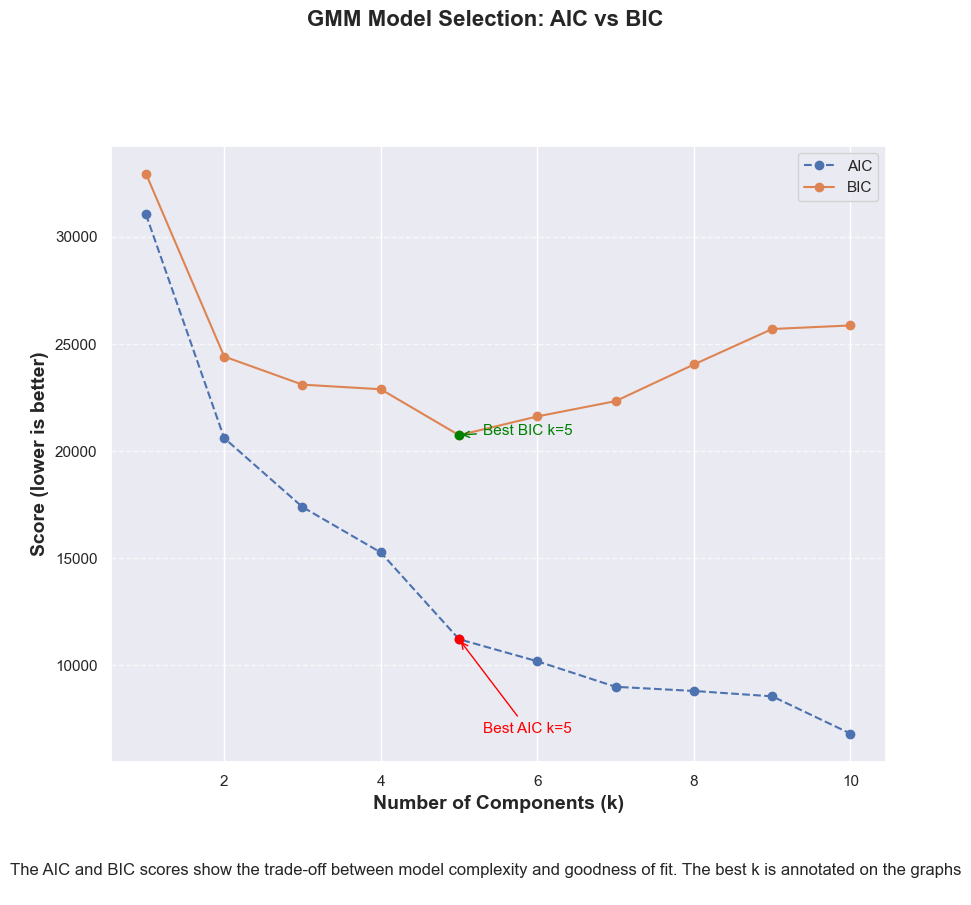

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=5, random_state=42)

In [13]:
minority_X = X_train[y_train == 1]   # minority samples only
# Determine optimal number of components using AIC & BIC
aic_scores, bic_scores = [], []
n_components_range = range(1, 11)

for k in n_components_range:
    gmm_k = GaussianMixture(n_components=k, random_state=42)
    gmm_k.fit(minority_X)
    aic_scores.append(gmm_k.aic(minority_X))
    bic_scores.append(gmm_k.bic(minority_X))
# Plot AIC & BIC to visually inspect
plt.figure(figsize=(10,8))
plt.plot(n_components_range, aic_scores, marker='o', label='AIC', linestyle='dashed')
plt.plot(n_components_range, bic_scores, marker='o', label='BIC')
plt.xlabel("Number of Components (k)", fontsize=14, fontweight="bold")
plt.ylabel("Score (lower is better)", fontsize=14, fontweight="bold")
plt.suptitle("GMM Model Selection: AIC vs BIC", fontsize=16, fontweight="bold", y=1.05)
plt.figtext(
    0.5, -0.05, 
    "The AIC and BIC scores show the trade-off between model complexity and goodness of fit. The best k is annotated on the graphs\n",
    wrap=True, ha="center", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

best_k_aic = 5
best_k_bic = n_components_range[np.argmin(bic_scores)]
# Annotate best AIC point
plt.scatter(best_k_aic, aic_scores[best_k_aic-1], color='red', zorder=5)
plt.annotate(
    f"Best AIC k={best_k_aic}",
    xy=(best_k_aic, aic_scores[best_k_aic-1]),
    xytext=(best_k_aic+0.3, min(aic_scores)+50),
    arrowprops=dict(arrowstyle="->", color='red'),
    fontsize=11,
    color='red'
)

# Annotate best BIC point
plt.scatter(best_k_bic, min(bic_scores), color='green', zorder=5)
plt.annotate(
    f"Best BIC k={best_k_bic}",
    xy=(best_k_bic, min(bic_scores)),
    xytext=(best_k_bic+0.3, min(bic_scores)+50),
    arrowprops=dict(arrowstyle="->", color='green'),
    fontsize=11,
    color='green'
)
#print(f"Best k by AIC: {best_k_aic}")
print(f"Best k by BIC: {best_k_bic}")
plt.show();
# You can pick either; here we’ll use BIC’s choice by default
best_k = best_k_bic
# Fit final GMM
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm.fit(minority_X)

#### Based on the BIC and AIC scores the optimal k is chosen to be 5

In [14]:
ratio = 0.5 
n_majority = sum(y_train == 0)
n_minority = sum(y_train == 1)

# number of synthetic samples to add
n_needed = int((ratio * n_majority) - n_minority)
n_needed = max(n_needed, 0)          # no negatives

X_gmm_samples, _ = gmm.sample(n_needed)

# Combining with original data
X_train_gmm = pd.concat([X_train, pd.DataFrame(X_gmm_samples, columns=X_train.columns)], axis=0)
y_train_gmm = np.concatenate([y_train, np.ones(n_needed)])


C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\53527483.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\53527483.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.05, 'Class Distribution Before and After GMM Sampling')

Text(0.5, -0.05, 'This plot compares the class distribution before and after GMM Sampling.\n')

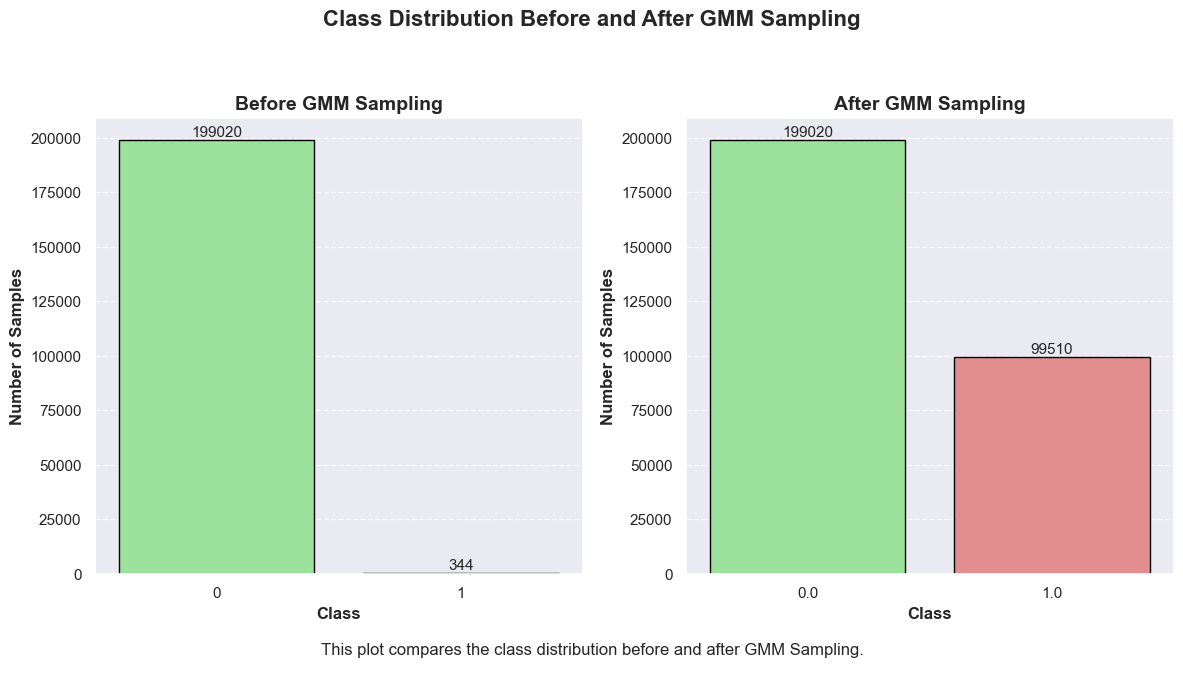

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

def plot_dist(y, title, ax):
    counts = Counter(y)
    # Light colors
    colors = ["lightgreen", "lightcoral"]  # 0 = light green, 1 = light red

    sns.barplot(
        x=list(counts.keys()),
        y=list(counts.values()),
        ax=ax,
        palette=colors,
        edgecolor="black"
    )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Class", fontsize=12, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=12, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Add value labels
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=11)

plot_dist(y_train,     "Before GMM Sampling", axes[0])
plot_dist(y_train_gmm, "After GMM Sampling",  axes[1])

plt.suptitle("Class Distribution Before and After GMM Sampling", fontsize=16, fontweight="bold", y=1.05)
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after GMM Sampling.\n",
    wrap=True, ha="center", fontsize=12
)
plt.tight_layout()
plt.show()

#### The number of samples have been increased to 50% of the majority class but GMM oversampling

#### Applying clustering based undersampling on the GMM oversampled dataset to balance the number of majority and minority class samples.

In [16]:
if not os.path.exists("X_train_gmm_cc.csv"):
    cluster = ClusterCentroids(estimator=MiniBatchKMeans(n_init='auto', batch_size=1000, random_state=42),random_state=42)
    X_train_gmm_cc, y_train_gmm_cc = cluster.fit_resample(X_train_gmm, y_train_gmm)
else:
    X_train_gmm_cc = pd.read_csv("X_train_gmm_cc.csv")
    y_train_gmm_cc = pd.read_csv("y_train_gmm_cc.csv").values.ravel()

C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\1398217063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\1398217063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\1398217063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.05, 'Class Distribution before and after GMM Sampling without and with CBU')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Number of Samples')

Text(0.5, -0.05, 'This plot compares the class distribution before and after GMM Sampling without and with CBU.\n')

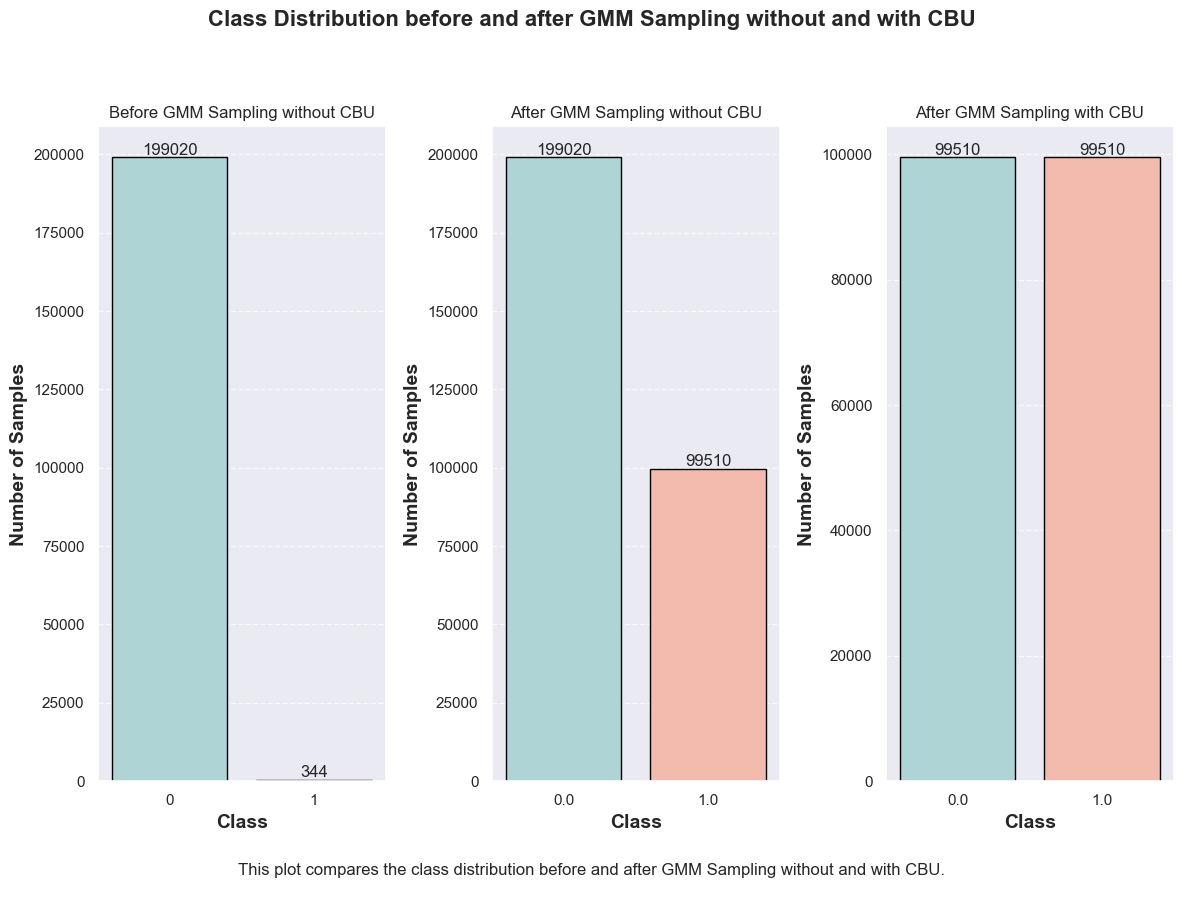

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

def plot_dist(y, title, ax):
    counts = Counter(y)
    light_colors = ["#a8dadc", "#ffb4a2"]  
    
    sns.barplot(
        x=list(counts.keys()),
        y=list(counts.values()),
        ax=ax,
        palette=light_colors,
        edgecolor="black",
        linewidth=1
    )
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,        "Before GMM Sampling without CBU", axes[0])
plot_dist(y_train_gmm,    "After GMM Sampling without CBU",  axes[1])
plot_dist(y_train_gmm_cc, "After GMM Sampling with CBU",     axes[2])

plt.suptitle(
    "Class Distribution before and after GMM Sampling without and with CBU",
    fontsize=16, fontweight="bold", y=1.05
)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")

plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after GMM Sampling without and with CBU.\n",
    wrap=True, ha="center", fontsize=12
)

plt.tight_layout()
plt.show()

#### When clustering based undersampling is applied, the size of the majority class is reduced to match the proportion of the minority class.

In [18]:
X_train_gmm_cc.to_csv("X_train_gmm_cc.csv", index=False)
pd.DataFrame(y_train_gmm_cc).to_csv("y_train_gmm_cc.csv", index=False)

### Now we will run the Logistic Regression on the GMM+CBU dataset

In [19]:
# Training on GMM-balanced data
gmm_model = LogisticRegression(max_iter=1000, solver='lbfgs')
gmm_model.fit(X_train_gmm, y_train_gmm)
y_pred_gmm = gmm_model.predict(X_test)
y_pred_gmm_scores = gmm_model.predict_proba(X_test)[:,1]
reports["GMM"] = classification_report(y_test, y_pred_gmm, digits=4, output_dict=True)
print("=== Logistic Regression with GMM Oversampling ===")
print(classification_report(y_test, y_pred_gmm, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gmm)*100:.2f}%")
#print(f"PRC-AUC: {roc_auc_score(y_test, y_pred_gmm_scores[:, 1])*100:.2f}%")
y_scores = gmm_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_scores)
reports["GMM"]["PR AUC"] = pr_auc
print(f"PR AUC : {pr_auc:.4f}")

LogisticRegression(max_iter=1000)

=== Logistic Regression with GMM Oversampling ===
              precision    recall  f1-score   support

           0     0.9997    0.9928    0.9963     85295
           1     0.1691    0.8446    0.2818       148

    accuracy                         0.9925     85443
   macro avg     0.5844    0.9187    0.6391     85443
weighted avg     0.9983    0.9925    0.9950     85443

Accuracy: 99.25%
PR AUC : 0.6946


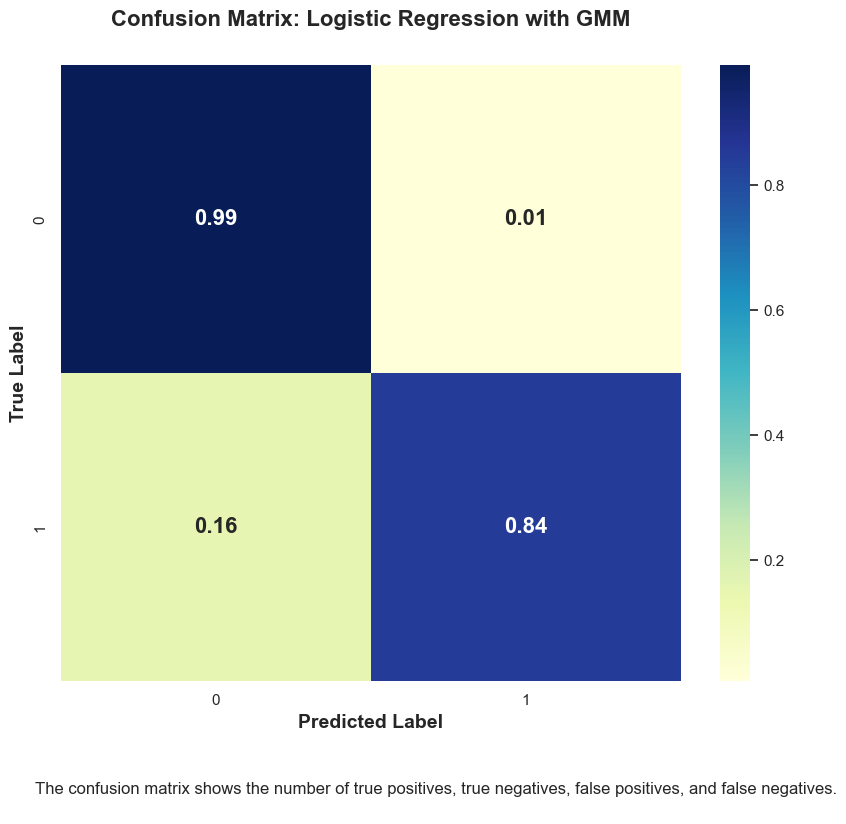

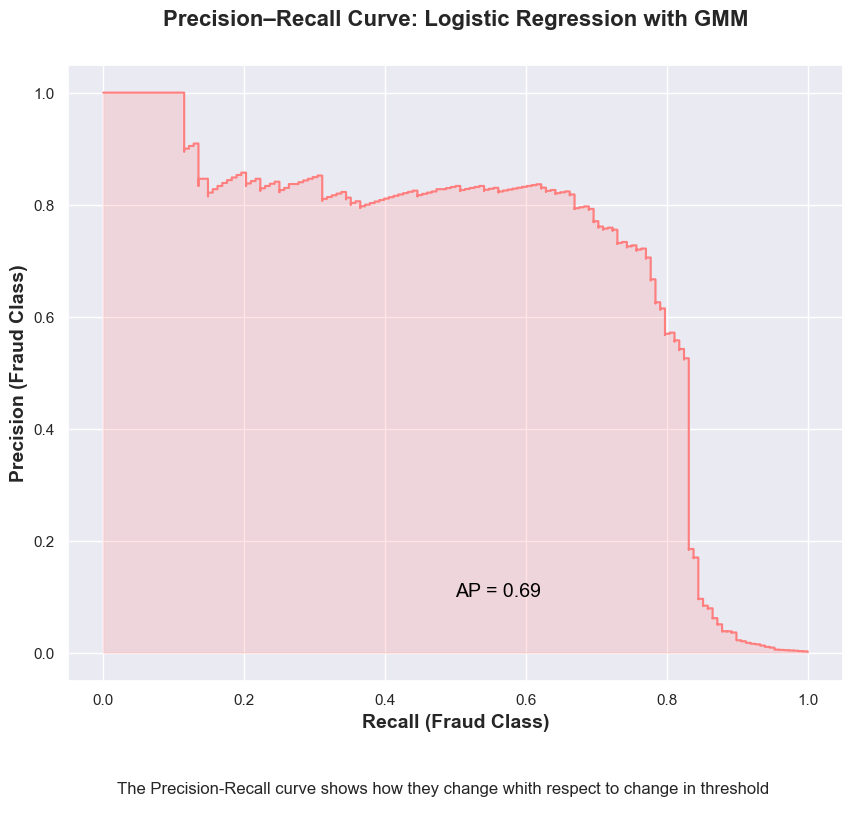

In [20]:
# Plotting the confusion matrix to further understand the performance of the model and the imbalance ratio
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, gmm_model.predict(X_test))
cm_norm = confusion_matrix(y_test, gmm_model.predict(X_test), normalize='true')
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, 
            annot_kws={"size": 16, "weight": "bold"}, ax=ax)

ax.set_title("Confusion Matrix: Logistic Regression with GMM", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.\n",
    wrap=True, ha="center", fontsize=12
)

plt.show();

# Plot the precision-recall curve to show how they change as the threshold changes
fig, ax = plt.subplots(figsize=(10, 8))

precision, recall, thresholds = precision_recall_curve(y_test, gmm_model.predict_proba(X_test)[:,1])
plt.step(recall, precision, where='post', color="#ff7f7f")  # light coral
plt.fill_between(recall, precision, step='post', alpha=0.2, color="#ff7f7f")
plt.text(0.5, 0.1, "AP = {:.2f}".format(average_precision_score(y_test, gmm_model.predict_proba(X_test)[:,1])), 
         fontsize=14, color="black")

ax.set_title("Precision–Recall Curve: Logistic Regression with GMM", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Recall (Fraud Class)", fontsize=14, fontweight="bold")
ax.set_ylabel("Precision (Fraud Class)", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The Precision-Recall curve shows how they change whith respect to change in threshold\n",
    wrap=True, ha="center", fontsize=12
)

plt.show();


### Logistic Regression with GMM Oversampling

#### Confusion Matrix
* **True Negatives (0→0):** 99% of majority (non-fraud) transactions are correctly classified. 
* **True Positives (1→1):** 84% of fraud cases are successfully detected.
* **False Negatives (1→0):** Only 16% of fraud goes undetected, a notable improvement from the 39% baseline.
* **False Positives (0→1):** Slightly higher (0.7%) than the baseline (0.02%), representing a small trade-off for improved recall.

#### Precision–Recall Curve
* The curve stays strong across most recall levels, showing that the model preserves high precision while recall increases.

#### Comparison
* **Recall Gain:** GMM oversampling significantly enhances fraud detection (recall) with only a minor reduction in precision and accuracy.
* **Class Imbalance Mitigation:** By generating synthetic minority samples, GMM enables the classifier to capture more diverse fraud patterns, cutting down false negatives without a large rise in false positives.

GMM-based oversampling tackles class imbalance by boosting minority-class recall, exchanging a slight decrease in precision for a substantial improvement in fraud detection.


In [21]:
# Training on GMM + ClusterCentroids data
gmm_cc_model = LogisticRegression(max_iter=1000, solver='lbfgs')
gmm_cc_model.fit(X_train_gmm_cc, y_train_gmm_cc)
y_pred_gmm_cc = gmm_cc_model.predict(X_test)
reports["GMM_CC"] = classification_report(y_test, y_pred_gmm_cc, digits=4, output_dict=True)
print("\n=== Logistic Regression with GMM + ClusterCentroids ===")
print(classification_report(y_test, y_pred_gmm_cc, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gmm_cc)*100:.2f}%")
y_scores = gmm_cc_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_scores)
reports["GMM_CC"]["PR AUC"] = pr_auc
print(f"PR AUC : {pr_auc:.4f}")

LogisticRegression(max_iter=1000)


=== Logistic Regression with GMM + ClusterCentroids ===
              precision    recall  f1-score   support

           0     0.9997    0.9834    0.9915     85295
           1     0.0824    0.8581    0.1504       148

    accuracy                         0.9832     85443
   macro avg     0.5411    0.9208    0.5710     85443
weighted avg     0.9982    0.9832    0.9901     85443

Accuracy: 98.32%
PR AUC : 0.6920


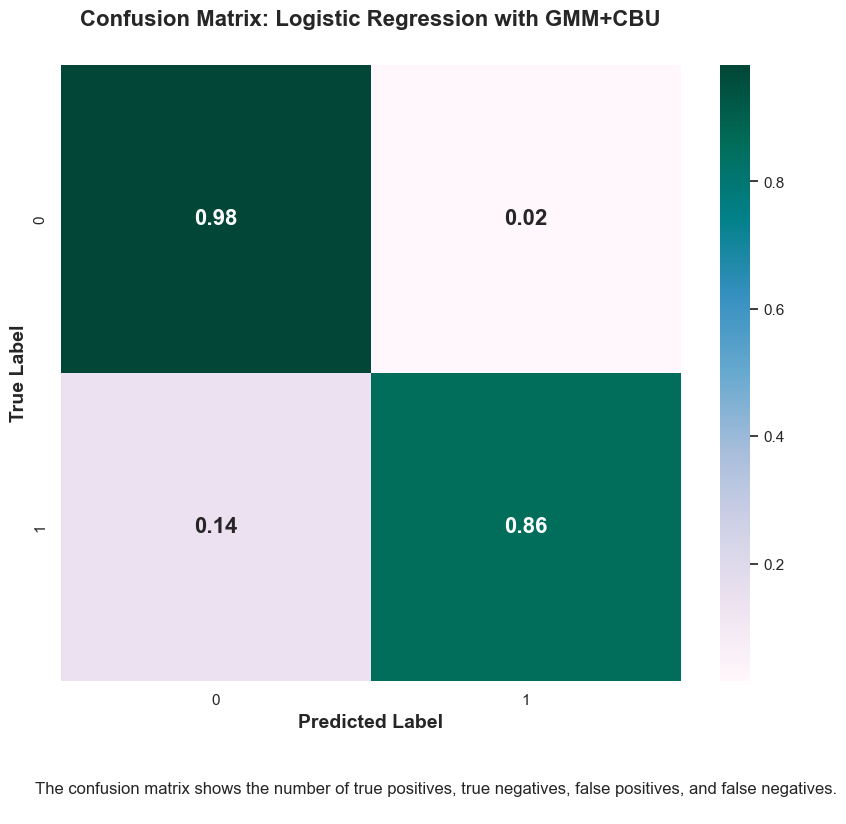

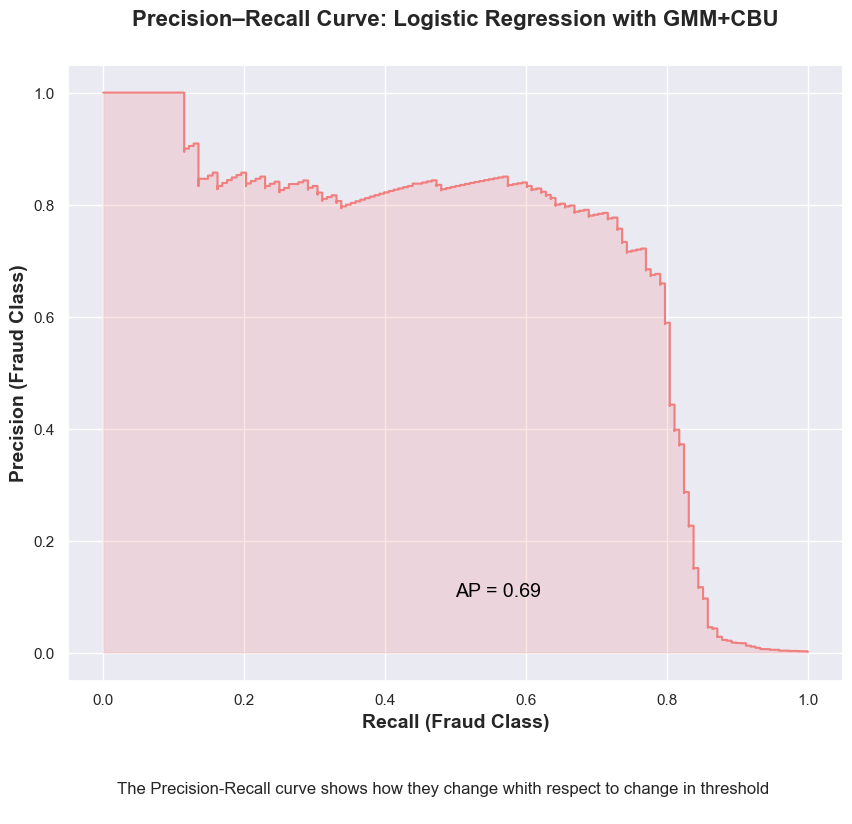

In [22]:
# Plotting the confusion matrix to further understand the performance of the model and the imbalance ratio
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, gmm_cc_model.predict(X_test))
cm_norm = confusion_matrix(y_test, gmm_cc_model.predict(X_test), normalize='true')
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="PuBuGn", cbar=True, 
            annot_kws={"size": 16, "weight": "bold"}, ax=ax)  # light teal/blue-green
#plt.figure(figsize=(10,8))
ax.set_title("Confusion Matrix: Logistic Regression with GMM+CBU", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.\n",
    wrap=True, ha="center", fontsize=12);

plt.show();

# Plotting the precision-recall curve to show how they change as the threshold changes
fig, ax = plt.subplots(figsize=(10, 8))
precision, recall, thresholds = precision_recall_curve(y_test, gmm_cc_model.predict_proba(X_test)[:,1])
plt.step(recall, precision, where='post', color='lightcoral')   # soft red
plt.fill_between(recall, precision, step='post', alpha=0.2, color='lightcoral')
plt.text(0.5, 0.1, "AP = {:.2f}".format(average_precision_score(y_test, gmm_cc_model.predict_proba(X_test)[:,1])), 
         fontsize=14, color="black")
#ax.figure(figsize=(10,8))
ax.set_title("Precision–Recall Curve: Logistic Regression with GMM+CBU", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Recall (Fraud Class)", fontsize=14, fontweight="bold")
ax.set_ylabel("Precision (Fraud Class)", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The Precision-Recall curve shows how they change whith respect to change in threshold\n",
    wrap=True, ha="center", fontsize=12)
plt.show();


### Logistic Regression with GMM Oversampling and CBU Undersampling

#### Confusion Matrix
* **True Negatives (0→0):** 98% of majority (non-fraud) transactions are correctly classified.
* **True Positives (1→1):** 86% of fraud cases are detected which is a slight improvement from GMM only model.  
* **False Negatives (1→0):** Just 14% of fraud cases are missed, also a minor improvement compared to GMM alone.
* **False Positives (0→1):** Higher than both the baseline and the GMM-only model.
* 
#### Precision–Recall Curve
* The curve remains strong across most recall levels, indicating that precision is largely maintained as recall increases.

#### Comparison
* **Recall Gain:** The combination of GMM oversampling with CBU undersampling enhances fraud detection (recall) and slightly lowers false negatives.

By pairing GMM-based oversampling with clustering-based undersampling, the model addresses class imbalance more effectively—strengthening minority-class recall while reducing the dominance of the majority class. This results in a modest overall performance gain.


## Part X: Resampling Approaches (Alternatives)

### Part X.1: Naive Oversampling (SMOTE) 

In [23]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

### Visualizing the effect of SMOTE on class Imabalance

C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\2393886301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),
C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\2393886301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),


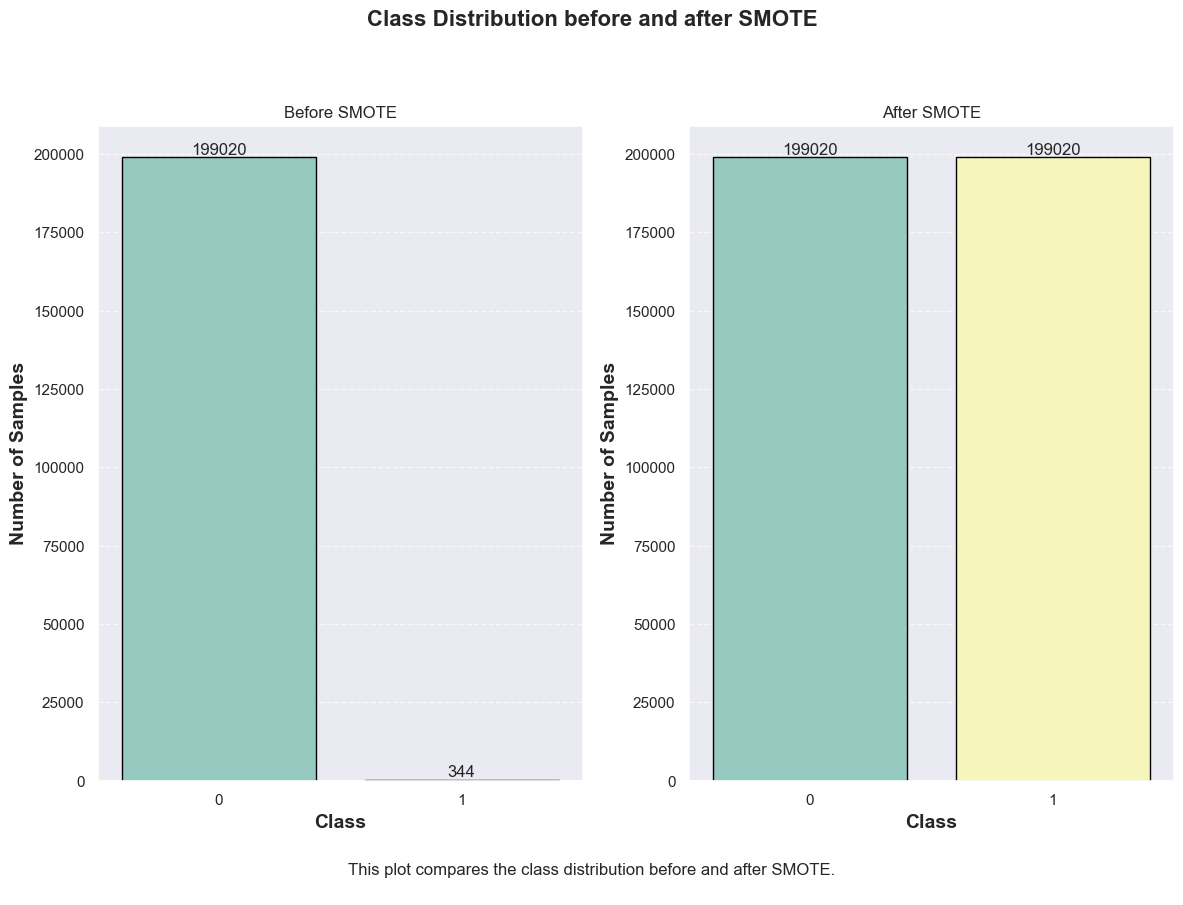

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
def plot_dist(y, title, ax):
    counts = Counter(y)
    sns.barplot(x=list(counts.keys()), y=list(counts.values()),
                ax=ax, palette="Set3", edgecolor="black")  # changed palette
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,    "Before SMOTE", axes[0])
plot_dist(y_train_sm, "After SMOTE",  axes[1])

plt.suptitle("Class Distribution before and after SMOTE", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after SMOTE.\n",
    wrap=True, ha="center", fontsize=12);
plt.tight_layout();
plt.show();

### Running the SMOTE model

In [25]:
smote_model = LogisticRegression(max_iter=1000, solver='lbfgs')
smote_model.fit(X_train_sm, y_train_sm)
y_pred_sm = smote_model.predict(X_test)
reports["SMOTE"] = classification_report(y_test, y_pred_sm, digits=4, output_dict=True)
print("=== SMOTE Logistic Regression ===")
print(classification_report(y_test, y_pred_sm, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_sm)*100:.2f}%")
y_scores = smote_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_scores)
reports["SMOTE"]["PR AUC"] = pr_auc
print(f"PR AUC : {pr_auc:.4f}")

LogisticRegression(max_iter=1000)

=== SMOTE Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0634    0.8784    0.1183       148

    accuracy                         0.9773     85443
   macro avg     0.5316    0.9279    0.5534     85443
weighted avg     0.9982    0.9773    0.9870     85443

Accuracy: 97.73%
PR AUC : 0.7062


### SMOTE generates new minority class samples by interpolating between two of its nearest neighbors. While it performs effectively for logistic regression tasks, it also has a drawback—it tends to magnify noise. If the minority class contains noisy data, SMOTE will interpolate around those points, producing even more noisy synthetic samples. Moreover, when the minority class is multimodal and lacks clear clusters, SMOTE may create synthetic points that do not accurately reflect the actual data distribution.

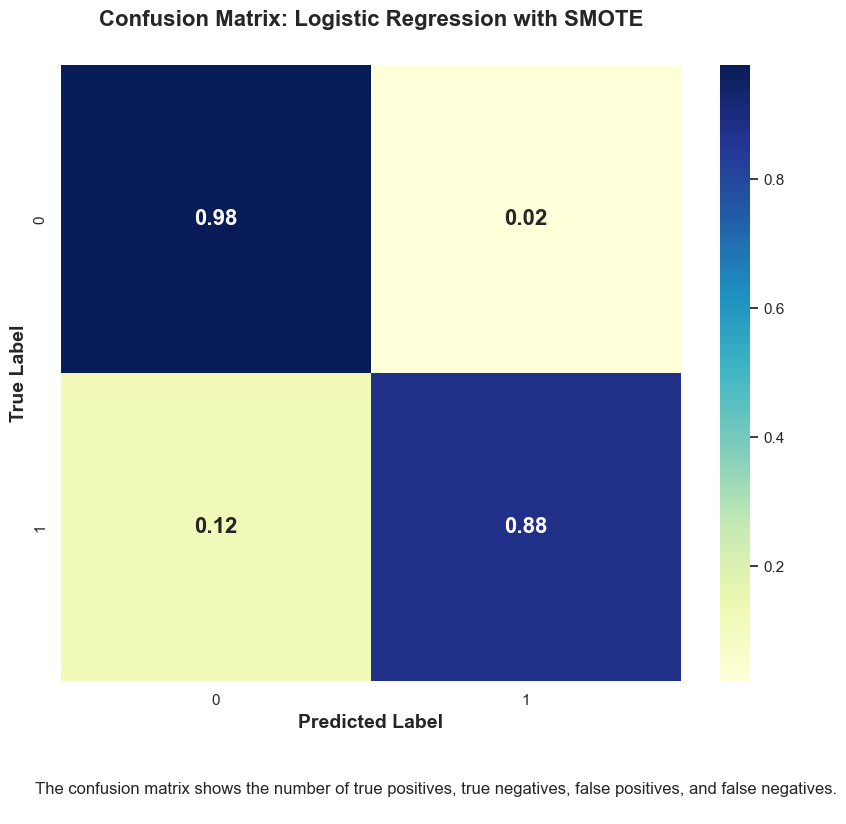

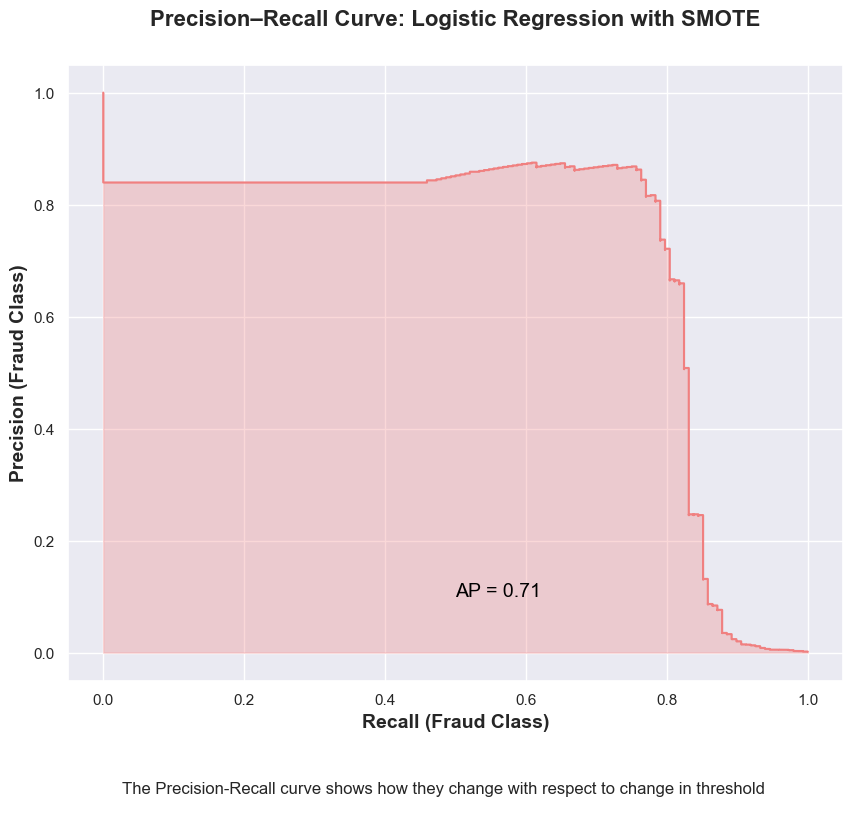

In [26]:
# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, smote_model.predict(X_test))
cm_norm = confusion_matrix(y_test, smote_model.predict(X_test), normalize='true')
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,   # lighter colormap
            annot_kws={"size": 16, "weight": "bold"}, ax=ax)

ax.set_title("Confusion Matrix: Logistic Regression with SMOTE", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.\n",
    wrap=True, ha="center", fontsize=12);

plt.show();

# Plot the precision-recall curve
fig, ax = plt.subplots(figsize=(10, 8))
precision, recall, thresholds = precision_recall_curve(y_test, smote_model.predict_proba(X_test)[:,1])
plt.step(recall, precision, where='post', color='lightcoral')   # lighter color
plt.fill_between(recall, precision, step='post', alpha=0.3, color='lightcoral')
plt.text(0.5, 0.1, "AP = {:.2f}".format(average_precision_score(y_test, smote_model.predict_proba(X_test)[:,1])), 
         fontsize=14, color="black")

ax.set_title("Precision–Recall Curve: Logistic Regression with SMOTE", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Recall (Fraud Class)", fontsize=14, fontweight="bold")
ax.set_ylabel("Precision (Fraud Class)", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The Precision-Recall curve shows how they change with respect to change in threshold\n",
    wrap=True, ha="center", fontsize=12)

plt.show();

### Part X.2 : Clustering Based Oversampling (CBO)

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

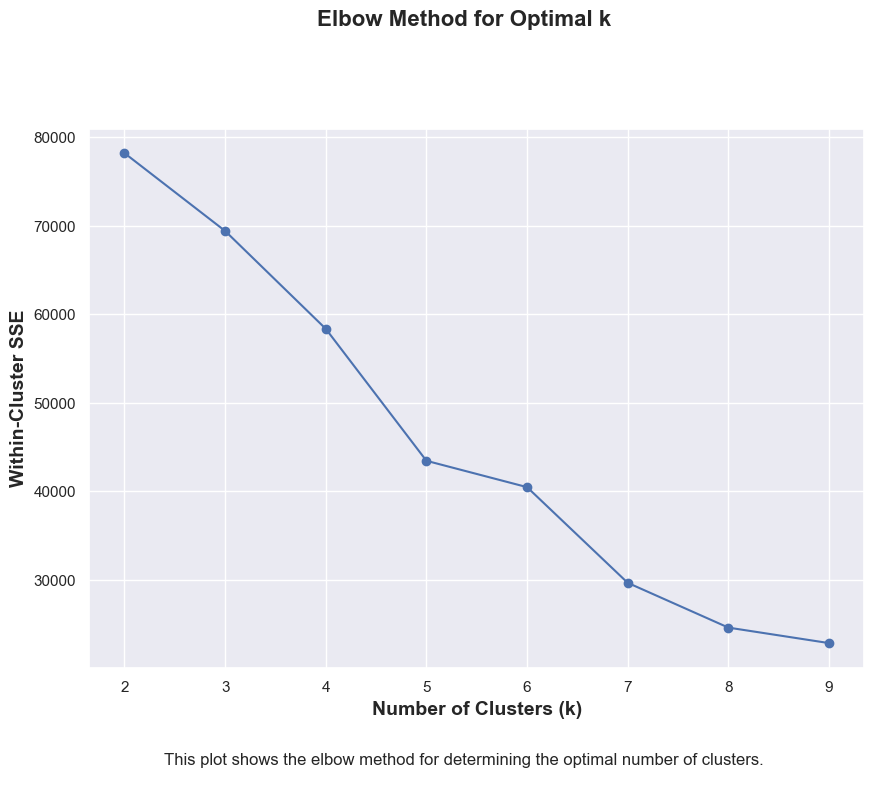

In [27]:
# Extract minority samples from training data
minority_X = X_train[y_train == 1]
# Calculate the inertia for different values of k
inertia = []    # list to store inertia values
K_range = range(2, 10)  # range of values for k (2 to 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(minority_X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K_range, inertia, marker='o')
plt.suptitle("Elbow Method for Optimal k", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Number of Clusters (k)", fontsize=14, fontweight="bold")
plt.ylabel("Within-Cluster SSE", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot shows the elbow method for determining the optimal number of clusters.\n",
    wrap=True, ha="center", fontsize=12);
plt.show();


In [28]:
# Let's choose k = 5 (from the elbow method plot)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(minority_X)
# Add the cluster labels to the minority data
minority_clustered = minority_X.copy()
minority_clustered["Cluster"] = clusters
# Get the count of samples in each cluster
cluster_counts = minority_clustered["Cluster"].value_counts() # number of samples in each cluster
max_count = cluster_counts.max()  # target size for balancing
balanced_minority = []  # list to store balanced minority data
for c in cluster_counts.index:
    cluster_data = minority_clustered[minority_clustered["Cluster"] == c].drop("Cluster", axis=1)
    oversampled = cluster_data.sample(max_count, replace=True, random_state=42)     # oversampling
    balanced_minority.append(oversampled)

balanced_minority = pd.concat(balanced_minority, axis=0) # concatenate the oversampled data
majority_X = X_train[y_train == 0]
# Concatenate the oversampled minority data with the majority data
X_train_cbo = pd.concat([majority_X, balanced_minority], axis=0)
y_train_cbo = np.array([0]*len(majority_X) + [1]*len(balanced_minority))

C:\Users\aminu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Visualizing the effect of CBO

C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\4204840338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),
C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\4204840338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),


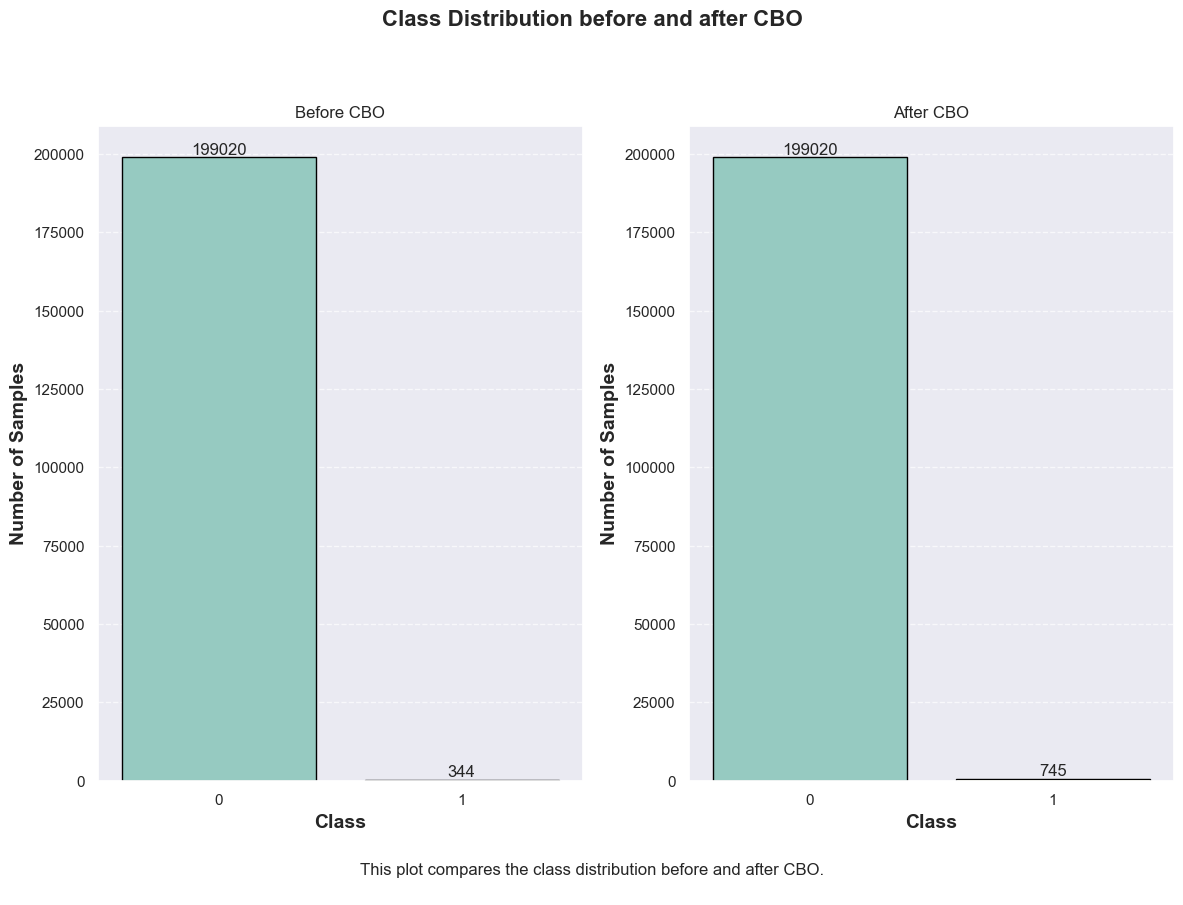

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
def plot_dist(y, title, ax):
    counts = Counter(y)
    sns.barplot(x=list(counts.keys()), y=list(counts.values()),
                ax=ax, palette="Set3", edgecolor="black", linewidth=1)  # lighter palette
    ax.set_title(title)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,    "Before CBO", axes[0])
plot_dist(y_train_cbo,"After CBO",  axes[1])

plt.suptitle("Class Distribution before and after CBO", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after CBO.\n",
    wrap=True, ha="center", fontsize=12);
plt.tight_layout()
plt.show();


### Now running the CBO model

In [30]:
cbo_model = LogisticRegression(max_iter=1000, solver='lbfgs')
cbo_model.fit(X_train_cbo, y_train_cbo)
y_pred_cbo = cbo_model.predict(X_test)
reports["CBO"] = classification_report(y_test, y_pred_cbo, digits=4, output_dict=True)
print("=== Logistic Regression with Clustering-Based Oversampling (CBO) ===")
print(classification_report(y_test, y_pred_cbo, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_cbo)*100:.2f}%")
y_scores = cbo_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_scores)
reports["CBO"]["PR AUC"] = pr_auc
print(f"PR AUC : {pr_auc:.4f}")

LogisticRegression(max_iter=1000)

=== Logistic Regression with Clustering-Based Oversampling (CBO) ===
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8378    0.6284    0.7181       148

    accuracy                         0.9991     85443
   macro avg     0.9186    0.8141    0.8589     85443
weighted avg     0.9991    0.9991    0.9991     85443

Accuracy: 99.91%
PR AUC : 0.6975


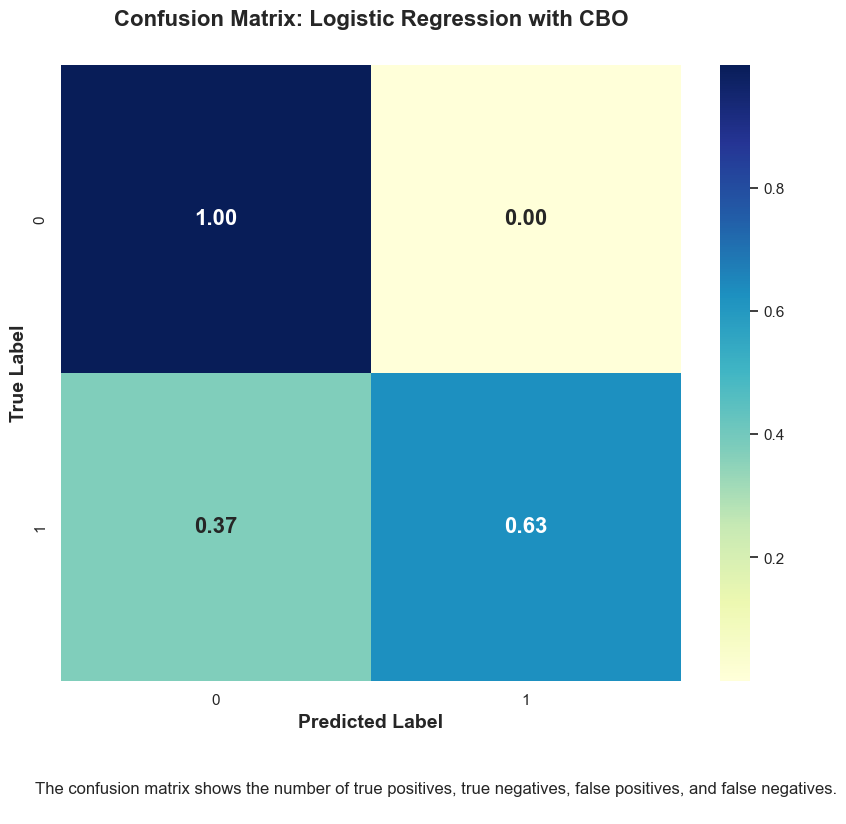

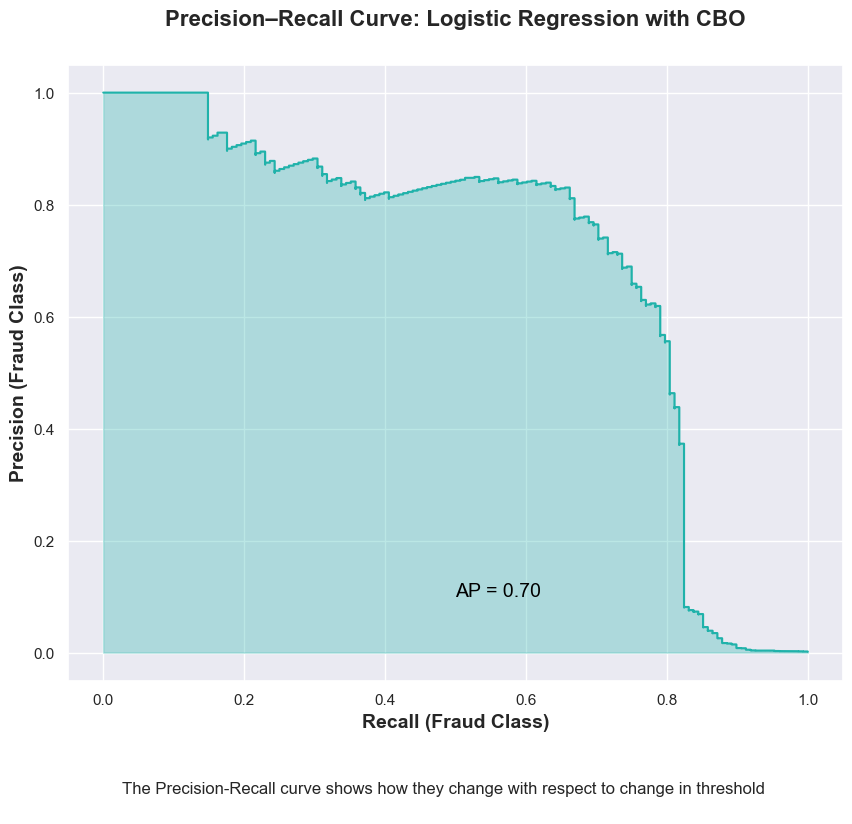

In [31]:
# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, cbo_model.predict(X_test))
cm_norm = confusion_matrix(y_test, cbo_model.predict(X_test), normalize='true')
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,   # lighter colormap
            annot_kws={"size": 16, "weight": "bold"}, ax=ax)

ax.set_title("Confusion Matrix: Logistic Regression with CBO", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.\n",
    wrap=True, ha="center", fontsize=12);

plt.show();

# Plot the precision-recall curve
fig, ax = plt.subplots(figsize=(10, 8))
precision, recall, thresholds = precision_recall_curve(y_test, cbo_model.predict_proba(X_test)[:,1])
plt.step(recall, precision, where='post', color='lightseagreen')   # lighter curve color
plt.fill_between(recall, precision, step='post', alpha=0.3, color='lightseagreen')
plt.text(0.5, 0.1, "AP = {:.2f}".format(average_precision_score(y_test, cbo_model.predict_proba(X_test)[:,1])), 
         fontsize=14, color="black")

ax.set_title("Precision–Recall Curve: Logistic Regression with CBO", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Recall (Fraud Class)", fontsize=14, fontweight="bold")
ax.set_ylabel("Precision (Fraud Class)", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The Precision-Recall curve shows how they change with respect to change in threshold\n",
    wrap=True, ha="center", fontsize=12)

plt.show();

### Similar to SMOTE, the minority class may have a multimodal distribution, and interpolating between such modes can produce unreliable outcomes. Clustering helps address this issue by identifying distinct sub-groups (modes) within the distribution. The key principle of CBO is that each cluster represents a fraudulent subtype, and oversampling ensures that all subtypes are equally represented in the dataset. This is achieved by repeatedly oversampling each subgroup until its size matches that of the majority class, allowing the model to learn from all forms of fraudulent subtypes.

### Part X.3: Clustering Based Undersampling (CBU)

In [32]:
cluster = ClusterCentroids(random_state=42)
X_train_cc, y_train_cc = cluster.fit_resample(X_train, y_train)

### Visualizing the effect of CBU

C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\441022263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),
C:\Users\aminu\AppData\Local\Temp\ipykernel_18656\441022263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),


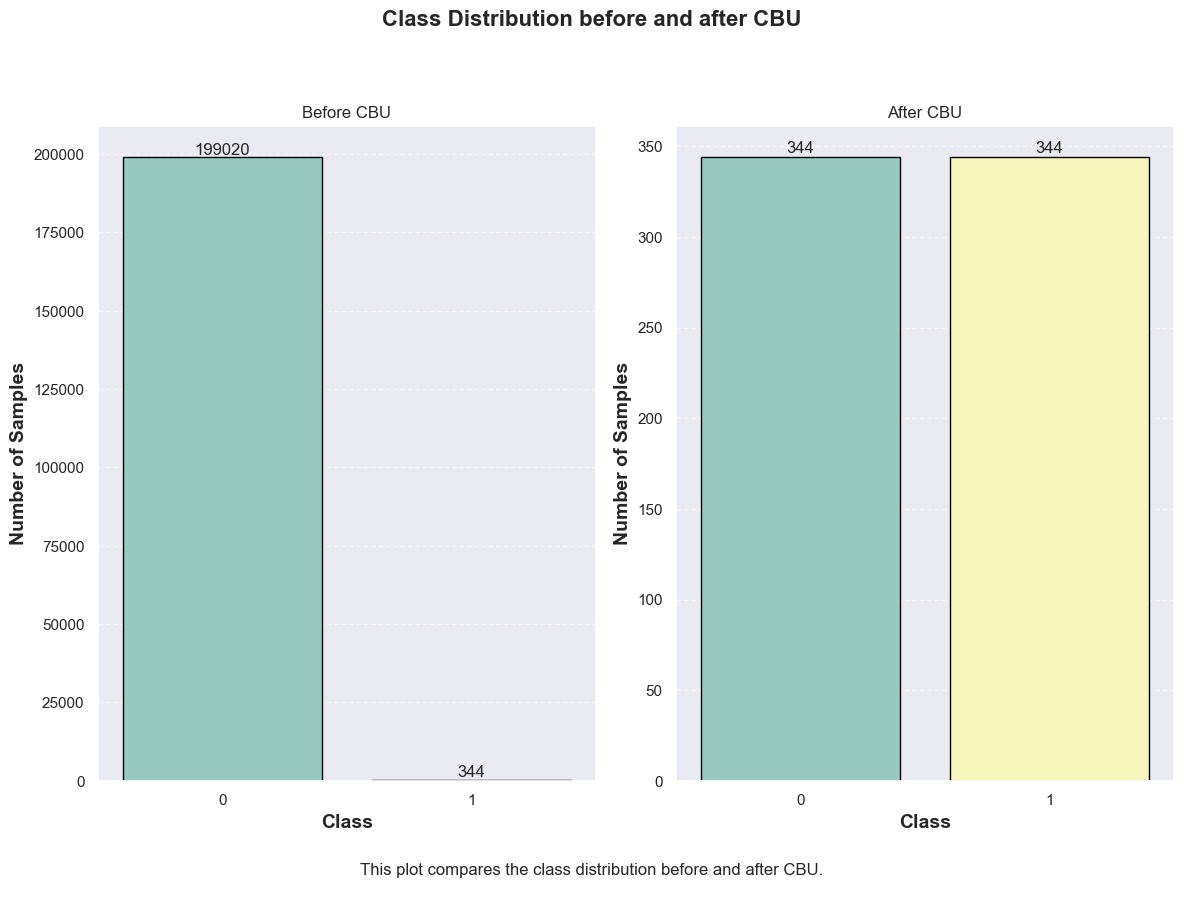

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
def plot_dist(y, title, ax):
    counts = Counter(y)
    sns.barplot(x=list(counts.keys()), y=list(counts.values()),
                ax=ax, palette="Set3", edgecolor="black", linewidth=1)  # lighter palette
    ax.set_title(title)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,   "Before CBU", axes[0])
plot_dist(y_train_cc,"After CBU",  axes[1])

plt.suptitle("Class Distribution before and after CBU", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after CBU.\n",
    wrap=True, ha="center", fontsize=12);
plt.tight_layout()
plt.show();

### Now running the CBU model

In [34]:
cc_model = LogisticRegression(max_iter=2000, solver='lbfgs')
cc_model.fit(X_train_cc, y_train_cc)
y_pred_cc = cc_model.predict(X_test)
reports["CC"] = classification_report(y_test, y_pred_cc, digits=4, output_dict=True)
print("=== Cluster Centroids Logistic Regression ===")
print(classification_report(y_test, y_pred_cc, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_cc)*100:.2f}%")
y_scores = cc_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_scores)
reports["CC"]["PR AUC"] = pr_auc
print(f"PR AUC : {pr_auc:.4f}")

LogisticRegression(max_iter=2000)

=== Cluster Centroids Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9998    0.9622    0.9806     85295
           1     0.0382    0.8649    0.0731       148

    accuracy                         0.9620     85443
   macro avg     0.5190    0.9135    0.5269     85443
weighted avg     0.9981    0.9620    0.9790     85443

Accuracy: 96.20%
PR AUC : 0.6678


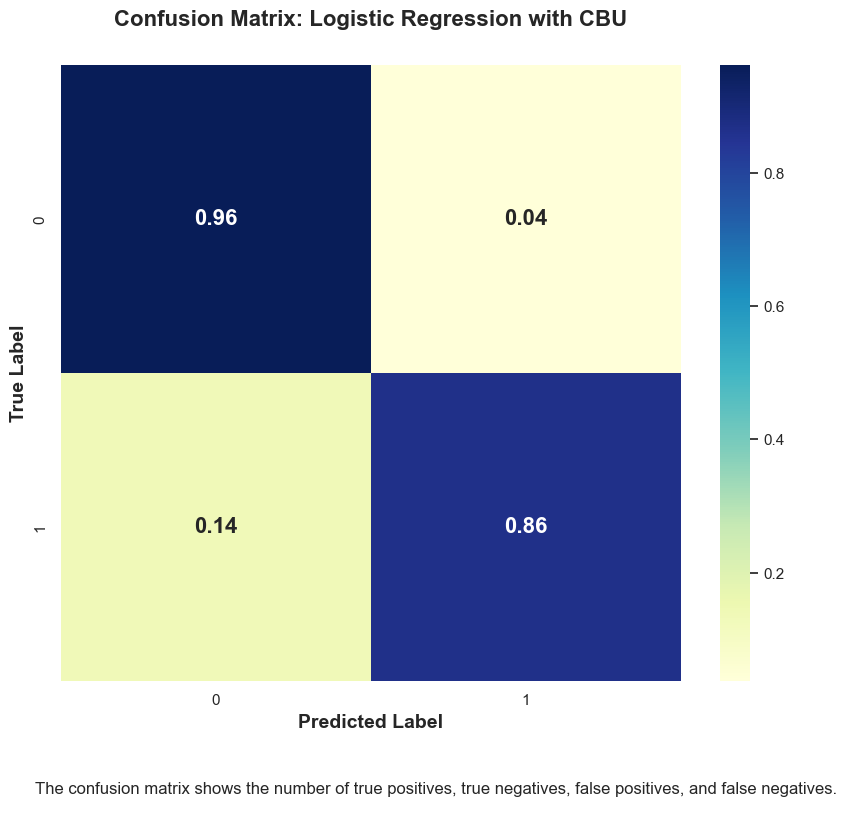

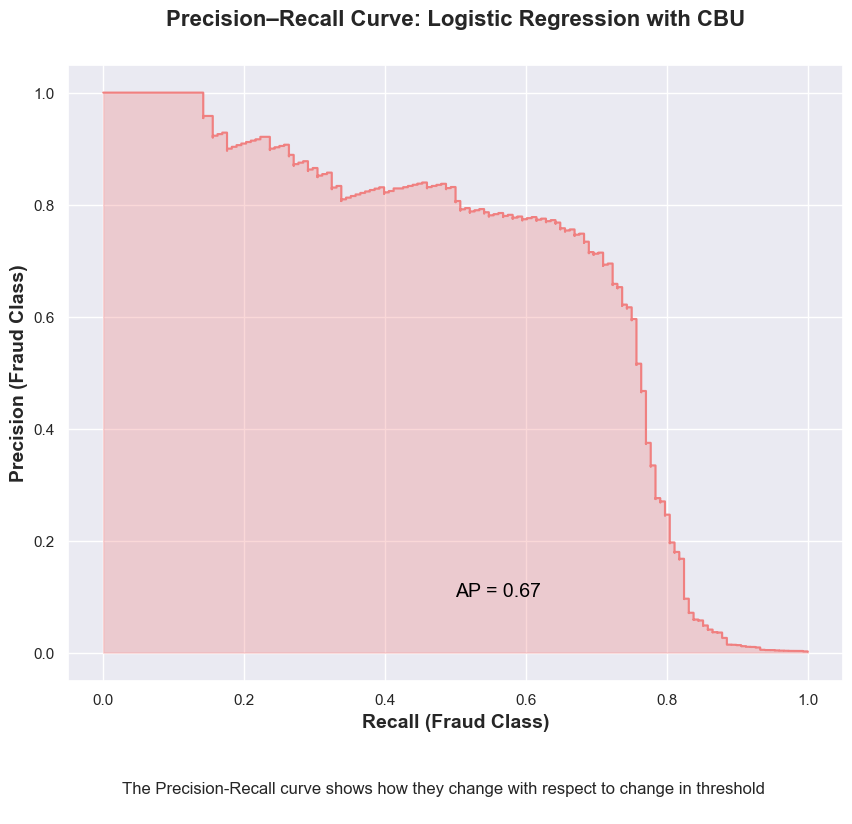

In [35]:
# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, cc_model.predict(X_test))
cm_norm = confusion_matrix(y_test, cc_model.predict(X_test), normalize='true')
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,   # lighter colormap
            annot_kws={"size": 16, "weight": "bold"}, ax=ax)

ax.set_title("Confusion Matrix: Logistic Regression with CBU", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.\n",
    wrap=True, ha="center", fontsize=12);

plt.show();

# Plot the precision-recall curve
fig, ax = plt.subplots(figsize=(10, 8))
precision, recall, thresholds = precision_recall_curve(y_test, cc_model.predict_proba(X_test)[:,1])
plt.step(recall, precision, where='post', color='lightcoral')   # lighter curve color
plt.fill_between(recall, precision, step='post', alpha=0.3, color='lightcoral')
plt.text(0.5, 0.1, "AP = {:.2f}".format(average_precision_score(y_test, cc_model.predict_proba(X_test)[:,1])), 
         fontsize=14, color="black")

ax.set_title("Precision–Recall Curve: Logistic Regression with CBU", fontsize=16, fontweight="bold", y=1.05)
ax.set_xlabel("Recall (Fraud Class)", fontsize=14, fontweight="bold")
ax.set_ylabel("Precision (Fraud Class)", fontsize=14, fontweight="bold")
fig.text(
    0.5, -0.05, 
    "The Precision-Recall curve shows how they change with respect to change in threshold\n",
    wrap=True, ha="center", fontsize=12)

plt.show();

### From another perspective, the class imbalance can also be addressed by reducing the majority class through undersampling. However, random undersampling risks discarding important data points and losing valuable information. Similar to how CBO works for the minority class, CBU applies clustering to the majority class and then performs proportional undersampling within each identified subgroup. The sampled subgroups are then combined into a new dataset, ensuring that undersampling is performed while still preserving the diversity and structure of the majority class.

## Part C: Performance Evaluation and Conclusion

### Training and Evaluating the Models

### **Baseline Logistic Regression**

=== Baseline Logistic Regression ===
                
                precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
    macro avg     0.9289    0.8073    0.8581     85443
    weighted avg     0.9991    0.9992    0.9991     85443

    Accuracy: 99.92%
### Although the model reports a high accuracy of 99.92%, its actual performance is poor. This is because simply predicting class 0 (non-fraudulent) most of the time would already yield about 99% accuracy. The real issue is revealed through recall: for class 1, the recall is only 61%, meaning that out of 148 true fraud cases, the model detected just around 91. This indicates a serious weakness in handling the minority (fraudulent) class. Precision, on the other hand, shows that 84% of the predicted fraud cases were correct, which is reasonably good. However, the F1-score, which balances recall and precision, is much lower than the overall accuracy, clearly exposing the class imbalance problem.

### **GMM Logistic Regression**

=== Logistic Regression with GMM Oversampling ===

                precision    recall  f1-score   support

           0     0.9997    0.9928    0.9963     85295
           1     0.1691    0.8446    0.2818       148

    accuracy                         0.9925     85443
    macro avg     0.5844    0.9187    0.6391     85443
    weighted avg     0.9983    0.9925    0.9950     85443

    Accuracy: 99.25%
    PR AUC : 0.6946

### The classification report illustrates the performance of logistic regression after applying GMM oversampling to the dataset. While GMM oversampling improved the recall for the minority class, it came at a significant cost: precision dropped drastically from 86% in the baseline model to just 17%. This indicates that although the minority class now carries greater weight in the dataset, the number of misclassified points has increased substantially. As a result, the overall F1-score fell to 28%, highlighting the trade-off between recall and precision.

### **GMM+CBU Logistic Regression**

=== Logistic Regression with GMM + ClusterCentroids ===

                precision    recall  f1-score   support

           0     0.9997    0.9834    0.9915     85295
           1     0.0824    0.8581    0.1503       148

    accuracy                         0.9832     85443
    macro avg     0.5411    0.9208    0.5709     85443
    weighted avg     0.9982    0.9832    0.9901     85443

    Accuracy: 98.32%
    PR AUC : 0.6912


### Clustering-Based Undersampling (CBU) is applied after GMM oversampling to balance the majority and minority classes in equal proportion. While this approach maintains a relatively high recall of 86% compared to the baseline model, it further reduces precision to just 8%. Consequently, the F1-score drops to 15%, showing no real improvement over the GMM-only model. The decline occurs because the number of false positives increases, indicating that the model struggles even more with correctly handling the majority class.

### **SMOTE Logistic Regression**


=== SMOTE Logistic Regression ===

                precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0634    0.8784    0.1183       148

    accuracy                         0.9773     85443
    macro avg     0.5316    0.9279    0.5534     85443
    weighted avg     0.9982    0.9773    0.9870     85443

    Accuracy: 97.73%

### After applying SMOTE to the minority class, recall improved significantly from 61% to 87%, indicating that the model is now able to detect most fraud cases and is no longer heavily biased toward the majority class. However, this improvement comes at a major cost—precision dropped sharply to just 6%. This suggests that SMOTE’s aggressive and sometimes inaccurate interpolation causes the model to classify non-fraudulent cases as fraudulent. As a result, the F1-score also fell, showing that SMOTE essentially traded precision for recall. Despite these shifts, overall accuracy remains around 97% because the proportion of fraudulent cases in the dataset is very small.

### **CBO Logistic Regression**

=== Logistic Regression with Clustering-Based Oversampling (CBO) ===

                precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8378    0.6284    0.7181       148

    accuracy                         0.9991     85443
    macro avg     0.9186    0.8141    0.8589     85443
    weighted avg     0.9991    0.9991    0.9991     85443

    Accuracy: 99.91%

### Logistic Regression combined with CBU delivers strong results. Recall improves slightly from 61% to 62%, indicating a modest gain in detecting fraudulent cases. While precision drops a bit compared to the baseline (83%), it remains far superior to the drastic collapse seen with naive SMOTE. This trade-off produces the best F1-score so far, offering the most balanced performance between recall and precision for the minority class. Overall, CBU achieves a solid compromise between fraud detection and false alarm rate, making it the most effective resampling strategy tested.


### **CBU Logistic Regression**

=== Cluster Centroids Logistic Regression ===

                precision    recall  f1-score   support

           0     0.9998    0.9622    0.9806     85295
           1     0.0382    0.8649    0.0731       148

    accuracy                         0.9620     85443
    macro avg     0.5190    0.9135    0.5269     85443
    weighted avg     0.9981    0.9620    0.9790     85443

    Accuracy: 96.20%


### With CBU applied, the logistic regression model handles fraudulent and non-fraudulent classes in a more balanced manner. This leads to the highest recall among all tested models (86.49%), meaning most fraud cases are detected. However, this improvement comes at a severe cost—precision for fraud cases drops to just 3.82%. In other words, the model incorrectly labels a large number of non-fraudulent cases as fraudulent. As a consequence, the F1-score reaches its lowest value, and overall accuracy falls to 96.20%. These results highlight that while recall improves, the surge in false positives causes the model to perform poorly on the majority class.

## Part 02: **Visualizing the score comparison using bar plots**

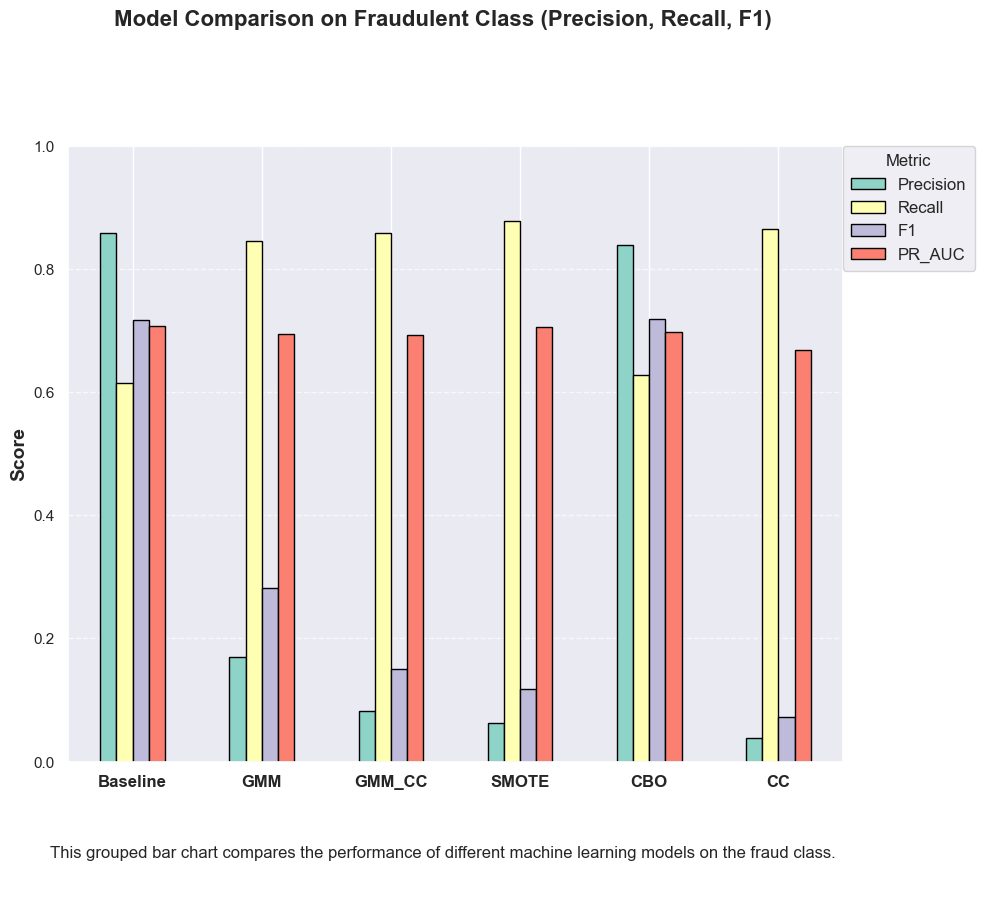

In [36]:
results = {}    # dictionary to store results
for model_name, report in reports.items():
    #print(report)
    fraud_metrics = report["1"]   # get metrics for class 1
    results[model_name] = {
        "Precision": fraud_metrics["precision"],
        "Recall": fraud_metrics["recall"],
        "F1": fraud_metrics["f1-score"],
        "PR_AUC": report["PR AUC"]
    }

# Convert to DataFrame
df_results = pd.DataFrame(results).T

# Plot grouped bar chart with new color palette
ax = df_results.plot(
    kind="bar", 
    figsize=(10,8), 
    color=sns.color_palette("Set3"),  # changed palette here
    edgecolor="black", 
    linewidth=1
)    

plt.suptitle("Model Comparison on Fraudulent Class (Precision, Recall, F1)", fontsize=16, fontweight="bold", y=1.05)
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=12, ha="center", fontweight="bold")
plt.ylim(0, 1)
plt.legend(title="Metric", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12, borderaxespad=0, borderpad=0.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.figtext(
    0.5, -0.05, 
    "This grouped bar chart compares the performance of different machine learning models on the fraud class.\n\n",
    wrap=True, ha="center", fontsize=12
)
plt.show();

## Part 03: Conclusions and Recommendations

### Benefits and Drawbacks of Each Resampling Method
- **Baseline (Imbalanced Data)**  
  1. **Benefit:** Very high precision which means that if it detects class 1, it detects correctly  
  2. **Drawback:** Very low recall due to missing most of the fraudulent 
  3. **Overall:** Clear case of data imbalance. 

- **GMM (GMM Oversampling)**  
  1. **Benefit:** Very high recall which means it detects most frauds. 
  2. **Drawback:** Very low precision which means it is doing a bad job in identifying fraud case as fraud.
  3. **Overall:** Overcompensate for the class imbalance by using Gaussian Mixture Model to generate synthetic data on a fitted probabilty distribution.

- **GMM+CBU (GMM Oversampling with Clustering-Based Undersampling / Cluster Centroids)**  
  1. **Benefit:** Very high recall which means it detects most frauds. 
  2. **Drawback:** Much lower than with the sole GMM model.
  3. **Overall:** Prioritizes detecting the fraud detection trading even lower precision at the cost of higher false alarms.

- **SMOTE (Naive Oversampling)**  
  1. **Benefit:** Strong improvement in recall (87%) — detects most frauds.  
  2. **Drawback:** Precision collapses due to misleading interpolations
  3. **Overall:** Overcompensates for imbalance by generating synthetic samples in regions without real data, leading to excessive false positives.  

- **CBO (Clustering-Based Oversampling)**  
  1. **Benefit:** Best balance between recall and precision
  2. **Drawback:** Recall is lower than SMOTE/CBU, but trade off is required for improvement in precision
  3. **Overall:** Best balance between detecting frauds and minimizing false alarms.  

- **CBU (Clustering-Based Undersampling / Cluster Centroids)**  
  1. **Benefit:** Very high recall (88%), almost all frauds are detected.  
  2. **Drawback:** Highest number of false alarms amongst all models
  3. **Overall:** Prioritizes fraud detection at the cost of false alarms


### How GMM Approaches Improve on SMOTE ??
Unlike SMOTE, which creates synthetic samples by linearly interpolating between neighboring minority points under the assumption of a single convex cluster, a Gaussian Mixture Model (GMM) learns a probabilistic mixture of Gaussians fitted to the minority class. This approach enables GMM to capture multiple subgroups, represent curved or non-convex structures, and maintain natural correlations among features. As a result, the synthetic data generated by GMM is more realistic, diverse, and better aligned with the complexity of the minority class distribution.



### **Final Recommendation**
**Using GMM for synthetic data generation in fraud detection provides a clear advantage over simpler methods like SMOTE. By modeling multiple subgroups and non convex regions, GMM produces synthetic samples that more accurately reflect the true complexity of the minority class distribution. This reduces the over smoothing and surge of false positives typically caused by SMOTE, while still achieving strong recall—an essential factor in fraud detection. Experimental results show that both GMM and GMM+CBU significantly improve fraud case detection, but GMM+CBU offers the best balance between recall and precision. Thus, GMM-based resampling—particularly when paired with clustering-based undersampling is a highly effective strategy for addressing class imbalance in fraud detection. It enhances detection capability while keeping false alarms at manageable levels, combining strong empirical outcomes with a solid theoretical foundation in data generation.**

